
# 回归预测分析实战


针对目标预测列数据不平衡情况，安装imblearn包

pip install imblearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,precision_score,recall_score
from sklearn.metrics import f1_score,SCORERS
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from imblearn.over_sampling import SMOTE

import seaborn as sns

from scipy.optimize import curve_fit

%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False

#import mglearn

from sklearn.datasets import load_boston

In [5]:
'''地区经济数据集'''
econ_data = pd.read_excel('PyDm_data.xlsx','MVdata',index_col=0)
econ_data.head()

,生产总值,从业人员,固定资产,利用外资,进出口额,新品出口,市场占有,对外依存
地区,,,,,,,,
北京,162.5193,1069.70,55.7893,196.906,3894.9,6470.514,2.6347,1.5479
天津,113.0728,763.16,70.6767,61.947,1033.9,7490.317,1.9862,0.5906
河北,245.1576,3962.42,163.8933,178.782,536.0,2288.188,1.2756,0.1412
山西,112.3755,1738.90,70.7306,104.945,147.6,1522.788,0.2424,0.0848
内蒙古,143.5988,1249.30,103.6517,54.426,119.4,342.358,0.2093,0.0537


In [6]:
econ_data.columns = ['Y','X1','X2','X3','X4','X5','X6','X7']
econ_data.head()

,Y,X1,X2,X3,X4,X5,X6,X7
地区,,,,,,,,
北京,162.5193,1069.70,55.7893,196.906,3894.9,6470.514,2.6347,1.5479
天津,113.0728,763.16,70.6767,61.947,1033.9,7490.317,1.9862,0.5906
河北,245.1576,3962.42,163.8933,178.782,536.0,2288.188,1.2756,0.1412
山西,112.3755,1738.90,70.7306,104.945,147.6,1522.788,0.2424,0.0848
内蒙古,143.5988,1249.30,103.6517,54.426,119.4,342.358,0.2093,0.0537


In [4]:
#econ_data.cov()
round(econ_data.corr(),3)
#econ_data[['Y','X1']].corr()

,Y,X1,X2,X3,X4,X5,X6,X7
Y,1.000,0.816,0.892,0.929,0.772,0.849,0.812,0.421
X1,0.816,1.000,0.857,0.696,0.387,0.511,0.463,0.011
X2,0.892,0.857,1.000,0.717,0.431,0.580,0.493,0.090
X3,0.929,0.696,0.717,1.000,0.878,0.854,0.869,0.614
X4,0.772,0.387,0.431,0.878,1.000,0.924,0.963,0.810
X5,0.849,0.511,0.580,0.854,0.924,1.000,0.970,0.565
X6,0.812,0.463,0.493,0.869,0.963,0.970,1.000,0.659
X7,0.421,0.011,0.090,0.614,0.810,0.565,0.659,1.000


array([[<AxesSubplot:xlabel='Y', ylabel='Y'>,
        <AxesSubplot:xlabel='X1', ylabel='Y'>,
        <AxesSubplot:xlabel='X2', ylabel='Y'>,
        <AxesSubplot:xlabel='X3', ylabel='Y'>,
        <AxesSubplot:xlabel='X4', ylabel='Y'>,
        <AxesSubplot:xlabel='X5', ylabel='Y'>,
        <AxesSubplot:xlabel='X6', ylabel='Y'>,
        <AxesSubplot:xlabel='X7', ylabel='Y'>],
       [<AxesSubplot:xlabel='Y', ylabel='X1'>,
        <AxesSubplot:xlabel='X1', ylabel='X1'>,
        <AxesSubplot:xlabel='X2', ylabel='X1'>,
        <AxesSubplot:xlabel='X3', ylabel='X1'>,
        <AxesSubplot:xlabel='X4', ylabel='X1'>,
        <AxesSubplot:xlabel='X5', ylabel='X1'>,
        <AxesSubplot:xlabel='X6', ylabel='X1'>,
        <AxesSubplot:xlabel='X7', ylabel='X1'>],
       [<AxesSubplot:xlabel='Y', ylabel='X2'>,
        <AxesSubplot:xlabel='X1', ylabel='X2'>,
        <AxesSubplot:xlabel='X2', ylabel='X2'>,
        <AxesSubplot:xlabel='X3', ylabel='X2'>,
        <AxesSubplot:xlabel='X4', ylabel='X2'>,
 

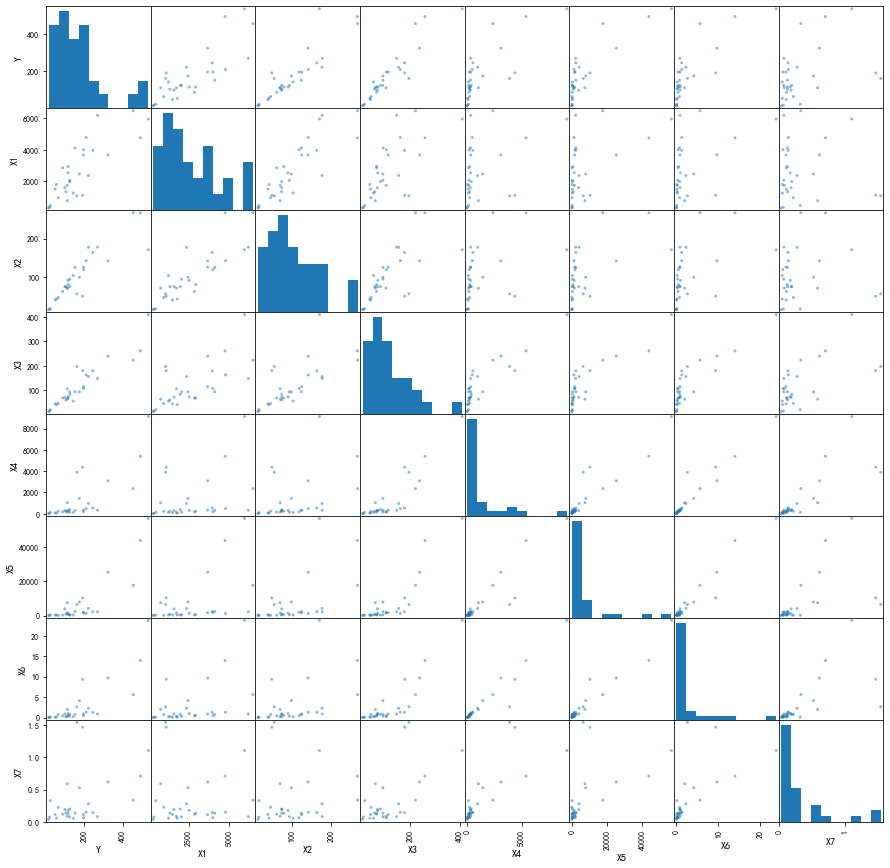

In [5]:
pd.plotting.scatter_matrix(econ_data,figsize=(15,15))

In [14]:
'''电信客户数据集'''
churn_data = pd.read_csv('telecom_churn.csv',skipinitialspace=True)
churn_data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [15]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


full dataset features说明：

- subscriberID="个人客户的ID"

- churn="是否流失：1=流失";

- Age="年龄"

- incomeCode="用户居住区域平均收入的代码"

- duration="在网时长"

- peakMinAv="统计期间内最高单月通话时长"

- peakMinDiff="统计期间结束月份与开始月份相比通话时长增加数量"

- posTrend="该用户通话时长是否呈现出上升态势：是=1"

- negTrend="该用户通话时长是否呈现出下降态势：是=1"

- nrProm="电话公司营销的数量"

- prom="最近一个月是否被营销过：是=1"

- curPlan="统计时间开始时套餐类型：1=最高通过200分钟；2=300分钟；3=350分钟；4=500分钟"

- avPlan="统计期间内平均套餐类型"

- planChange="统计结束时和开始时套餐的变化：正值代表套餐档次提升，负值代表下降，0代表不变"

- posPlanChange="统计期间是否提高套餐：1=是"

- negPlanChange="统计期间是否降低套餐：1=是"

- call_10086="拨打10086的次数"

## 一元线性回归模型

In [12]:
y = econ_data.Y
x = econ_data.X3
'''add_constant:在一个 array 左侧加上一列 1'''
fm1=sm.OLS(y,sm.add_constant(x,prepend=True)).fit()
fm1.params

const    13.904823
X3        1.385851
dtype: float64

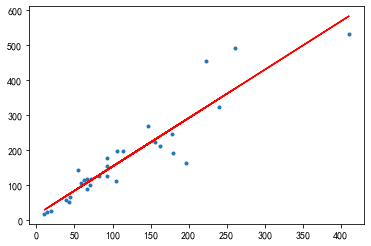

In [13]:
yfit=fm1.fittedvalues;
plt.plot(x, y,'.',x,yfit, 'r-')

In [15]:
'''一元线性回归模型的检验'''
print(fm1.tvalues)
print(fm1.pvalues)
pd.DataFrame({'b估计值':fm1.params,'t值':fm1.tvalues,'p-value':fm1.pvalues})

const     0.923506
X3       13.248189
dtype: float64
const    3.636341e-01
X3       1.393866e-13
dtype: float64


,b估计值,t值,p-value
const,13.904823,0.923506,3.636341e-01
X3,1.385851,13.248189,1.393866e-13


In [17]:
'''根据公式建回归模型'''
fm2=smf.ols('Y~X3', econ_data).fit()
pd.DataFrame({'b估计值':fm2.params,'t值':fm2.tvalues,'p-value':fm2.pvalues})

,b估计值,t值,概率p
Intercept,13.904823,0.923506,3.636341e-01
X3,1.385851,13.248189,1.393866e-13


In [18]:
'''回归系数检验表'''
print(fm2.summary2().tables[0])
fm2.summary2().tables[1]

                     0                 1                    2         3
0               Model:               OLS      Adj. R-squared:     0.858
1  Dependent Variable:                 Y                 AIC:  321.0752
2                Date:  2022-04-07 16:20                 BIC:  323.8776
3    No. Observations:                30      Log-Likelihood:   -158.54
4            Df Model:                 1         F-statistic:     175.5
5        Df Residuals:                28  Prob (F-statistic):  1.39e-13
6           R-squared:             0.862               Scale:    2441.3


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,13.904823,15.056563,0.923506,3.636341e-01,-16.937147,44.746794
X3,1.385851,0.104607,13.248189,1.393866e-13,1.171574,1.600129


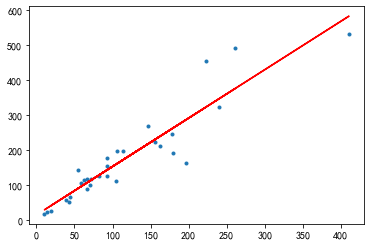

In [19]:
plt.plot(econ_data.X3,econ_data.Y,'.',econ_data.X3,fm2.fittedvalues,'r-')

In [20]:
'''一元线性回归模型的预测'''
fm2.predict(pd.DataFrame({'X3': [30,111,174.5]}))

0     55.480363
1    167.734318
2    255.735876
dtype: float64

## 多元线性回归模型

In [21]:
M1 = smf.ols('Y~X1',econ_data).fit()
M1.params
M1.summary2()#summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.653   
Dependent Variable: Y                AIC:                347.7627
Date:               2022-04-07 16:20 BIC:                350.5651
No. Observations:   30               Log-Likelihood:     -171.88 
Df Model:           1                F-statistic:        55.61   
Df Residuals:       28               Prob (F-statistic): 4.02e-08
R-squared:          0.665            Scale:              5942.4  
------------------------------------------------------------------
               Coef.   Std.Err.    t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept     14.6842   25.5399  0.5750  0.5699  -37.6319  67.0003
X1             0.0603    0.0081  7.4572  0.0000    0.0438   0.0769
-----------------------------------------------------------------
Omnibus:              2.833        Durbin-Watson:           1.612
Prob(Omnibus):        0.243        Jarque-Bera (JB):        2.029
Skew:                 0.637        Prob(JB):                0.363
Kurtosis:             3.031        Condition No.:           5728 
=================================================================
* The condition number is large (6e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [22]:
M2 = smf.ols('Y~X1+X2',econ_data).fit()
M2.params
M2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.791   
Dependent Variable: Y                AIC:                333.4353
Date:               2022-04-07 16:20 BIC:                337.6389
No. Observations:   30               Log-Likelihood:     -163.72 
Df Model:           2                F-statistic:        55.97   
Df Residuals:       27               Prob (F-statistic): 2.48e-10
R-squared:          0.806            Scale:              3576.0  
------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept   -12.4511   20.7420  -0.6003  0.5533  -55.0100  30.1079
X1            0.0142    0.0122   1.1689  0.2527   -0.0107   0.0392
X2            1.4599    0.3304   4.4192  0.0001    0.7821   2.1377
-----------------------------------------------------------------
Omnibus:              25.116       Durbin-Watson:          1.910 
Prob(Omnibus):        0.000        Jarque-Bera (JB):       43.075
Skew:                 1.941        Prob(JB):               0.000 
Kurtosis:             7.403        Condition No.:          6001  
=================================================================
* The condition number is large (6e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [23]:
M3 = smf.ols('Y~X1+X2+X3',econ_data).fit()
M3.params
M3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.964   
Dependent Variable: Y                AIC:                281.6542
Date:               2022-04-07 16:20 BIC:                287.2590
No. Observations:   30               Log-Likelihood:     -136.83 
Df Model:           3                F-statistic:        259.2   
Df Residuals:       26               Prob (F-statistic): 1.76e-19
R-squared:          0.968            Scale:              618.34  
------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept   -23.9232    8.6835  -2.7550  0.0106  -41.7724  -6.0739
X1            0.0007    0.0052   0.1376  0.8916   -0.0100   0.0114
X2            0.9201    0.1453   6.3327  0.0000    0.6214   1.2187
X3            0.8852    0.0776  11.4082  0.0000    0.7257   1.0447
-----------------------------------------------------------------
Omnibus:               3.524        Durbin-Watson:          2.149
Prob(Omnibus):         0.172        Jarque-Bera (JB):       2.910
Skew:                  -0.758       Prob(JB):               0.233
Kurtosis:              2.829        Condition No.:          6047 
=================================================================
* The condition number is large (6e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [24]:
M4 = smf.ols('Y~X1+X2+X3+X4+X5',econ_data).fit()
M4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.988   
Dependent Variable: Y                AIC:                250.5609
Date:               2022-04-07 16:20 BIC:                258.9681
No. Observations:   30               Log-Likelihood:     -119.28 
Df Model:           5                F-statistic:        473.0   
Df Residuals:       24               Prob (F-statistic): 3.77e-23
R-squared:          0.990            Scale:              207.95  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -4.8114    5.8162  -0.8272  0.4162  -16.8155  7.1927
X1             0.0088    0.0034   2.6065  0.0155    0.0018  0.0157
X2             0.9695    0.0967  10.0243  0.0000    0.7699  1.1691
X3             0.2500    0.1246   2.0068  0.0562   -0.0071  0.5072
X4             0.0146    0.0062   2.3797  0.0256    0.0019  0.0274
X5             0.0015    0.0007   2.2452  0.0342    0.0001  0.0029
-----------------------------------------------------------------
Omnibus:               0.211        Durbin-Watson:          2.461
Prob(Omnibus):         0.900        Jarque-Bera (JB):       0.218
Skew:                  -0.167       Prob(JB):               0.897
Kurtosis:              2.751        Condition No.:          33061
=================================================================
* The condition number is large (3e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

In [25]:
M_full=smf.ols('Y~X1+X2+X3+X4+X5+X6+X7',econ_data).fit()
M_full.params
M_full.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.988   
Dependent Variable: Y                AIC:                252.7118
Date:               2022-04-07 16:20 BIC:                263.9214
No. Observations:   30               Log-Likelihood:     -118.36 
Df Model:           7                F-statistic:        329.6   
Df Residuals:       22               Prob (F-statistic): 9.08e-21
R-squared:          0.991            Scale:              213.29  
------------------------------------------------------------------
              Coef.   Std.Err.     t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept    -7.1381    7.2431  -0.9855  0.3351  -22.1594   7.8833
X1            0.0085    0.0037   2.2767  0.0329    0.0008   0.0162
X2            0.9983    0.1067   9.3544  0.0000    0.7770   1.2196
X3            0.2384    0.1269   1.8786  0.0736   -0.0248   0.5017
X4            0.0069    0.0122   0.5657  0.5773   -0.0184   0.0323
X5            0.0009    0.0012   0.7479  0.4624   -0.0016   0.0034
X6            4.0465    3.4358   1.1777  0.2515   -3.0789  11.1719
X7           10.2607   23.4872   0.4369  0.6665  -38.4488  58.9702
-----------------------------------------------------------------
Omnibus:              1.261        Durbin-Watson:          2.370 
Prob(Omnibus):        0.532        Jarque-Bera (JB):       0.425 
Skew:                 -0.231       Prob(JB):               0.809 
Kurtosis:             3.355        Condition No.:          134156
=================================================================
* The condition number is large (1e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In [26]:
'''多元线性回归模型评判'''
'''模型M_full的残差'''
et=M_full.resid
et

地区
北京     -1.425285
天津      0.364283
河北     -0.008865
山西      4.852374
内蒙古    21.134311
辽宁    -27.157561
吉林      8.649295
黑龙江    13.805600
上海      4.780782
江苏    -11.802198
浙江     10.557630
安徽    -30.032533
福建      1.597955
江西    -14.231977
山东     26.905327
河南      2.832399
湖北     11.411582
湖南     20.478135
广东     -1.855679
广西     -2.071764
海南      2.553738
重庆     -8.683145
四川    -15.043469
贵州     -4.493474
云南    -10.203891
陕西     -4.794068
甘肃     -7.551264
青海      3.834572
宁夏      4.272939
新疆      1.324251
dtype: float64

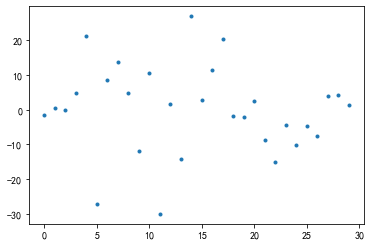

In [27]:
'''残差图'''
plt.plot(et.values,'.')

In [28]:
et.shift(1)

地区
北京           NaN
天津     -1.425285
河北      0.364283
山西     -0.008865
内蒙古     4.852374
辽宁     21.134311
吉林    -27.157561
黑龙江     8.649295
上海     13.805600
江苏      4.780782
浙江    -11.802198
安徽     10.557630
福建    -30.032533
江西      1.597955
山东    -14.231977
河南     26.905327
湖北      2.832399
湖南     11.411582
广东     20.478135
广西     -1.855679
海南     -2.071764
重庆      2.553738
四川     -8.683145
贵州    -15.043469
云南     -4.493474
陕西    -10.203891
甘肃     -4.794068
青海     -7.551264
宁夏      3.834572
新疆      4.272939
dtype: float64

In [32]:
ro=et.corr(et.shift(1))
ro

-0.18553688673391783

In [33]:
'''Durbin-Watson 统计量：分析中残差的一阶自相关性'''
DW=2*(1-ro)
DW

2.3710737734678355

从描述上来讲，残差存在自相关性，可能的原因因为有：
- 遗漏变量

这个变量成为了联系残差之间的重要中介，所以表现出自相关性。

- 模型函数形式设定有误

比如说把一个非线性形式的方程用线性表示，或者说明明对数线性模型，用了线性方程直接描述。

- 系统本身的惯性问题

由于系统惯性的原因使得相邻两期之间存在自相关。

残差自相关直接能说明的是因变量自相关，经典假设对自变量的要求是有显著变异，无多重共线性并且与残差不相关。

Durbin-Watson统计量检验表：https://support.minitab.com/zh-cn/minitab/18/help-and-how-to/modeling-statistics/regression/supporting-topics/model-assumptions/test-for-autocorrelation-by-using-the-durbin-watson-statistic/

In [ ]:
#练习：残差是否存在一阶自相关性？分析原因

In [38]:
#'''回归模型简表'''
#M_full.summary2()
'''回归模型统计量'''
M_full.summary2().tables[0]

,0,1,2,3
0,Model:,OLS,Adj. R-squared:,0.988
1,Dependent Variable:,Y,AIC:,252.7118
2,Date:,2022-04-07 16:46,BIC:,263.9214
3,No. Observations:,30,Log-Likelihood:,-118.36
4,Df Model:,7,F-statistic:,329.6
5,Df Residuals:,22,Prob (F-statistic):,9.08e-21
6,R-squared:,0.991,Scale:,213.29


In [35]:
'''回归系数检验表'''
M_full.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-7.138064,7.243135,-0.985494,3.350967e-01,-22.159406,7.883278
X1,0.008497,0.003732,2.276662,3.288897e-02,0.000757,0.016237
X2,0.998300,0.106720,9.354405,4.008029e-09,0.776977,1.219624
X3,0.238449,0.126928,1.878619,7.361245e-02,-0.024783,0.501682
X4,0.006917,0.012226,0.565747,5.772910e-01,-0.018439,0.032273
X5,0.000906,0.001211,0.747926,4.624253e-01,-0.001606,0.003418
X6,4.046515,3.435806,1.177748,2.514809e-01,-3.078911,11.171940
X7,10.260713,23.487226,0.436864,6.664682e-01,-38.448811,58.970238


In [36]:
'''模型残差分析表'''
M_full.summary2().tables[2]

,0,1,2,3
0,Omnibus:,1.261,Durbin-Watson:,2.370
1,Prob(Omnibus):,0.532,Jarque-Bera (JB):,0.425
2,Skew:,-0.231,Prob(JB):,0.809
3,Kurtosis:,3.355,Condition No.:,134156


In [64]:
'''DW值'''
print('Durbin-Watson: ', M_full.summary2().tables[2][3][0])
'''JB值,在统计学中，Jarque–Bera检验是对样本数据是否具有符合正态分布的偏度和峰度的
拟合优度的检验。其统计测试结果总是非负的。如果结果远大于零，则表示数据不具有正态分布。'''
print('Jarque-Bera: ', M_full.summary2().tables[2][3][1])
'''JB概率(p-value) 0.809 JB服从卡方分布，样本数据服从正态分布'''
print('Prob(JB): ',M_full.summary2().tables[2][3][2])

Durbin-Watson:  2.370
Jarque-Bera:  0.425
Prob(JB):  0.809


In [39]:
'''模型的决定系数R2'''
R2=M_full.summary2().tables[0][1][6]
R2

'0.991'

In [40]:
'''adj.R2'''
M_full.summary2().tables[0][3][0]

'0.988'

In [42]:
'''模型结果比较'''
summary_col([M1,M2,M3,M4,M_full])

,Y I,Y II,Y III,Y IIII,Y IIIII
Intercept,14.6842,-12.4511,-23.9232,-4.8114,-7.1381
,(25.5399),(20.7420),(8.6835),(5.8162),(7.2431)
R-squared,0.6651,0.8057,0.9676,0.9900,0.9906
R-squared Adj.,0.6531,0.7913,0.9639,0.9879,0.9876
X1,0.0603,0.0142,0.0007,0.0088,0.0085
,(0.0081),(0.0122),(0.0052),(0.0034),(0.0037)
X2,,1.4599,0.9201,0.9695,0.9983
,,(0.3304),(0.1453),(0.0967),(0.1067)
X3,,,0.8852,0.2500,0.2384
,,,(0.0776),(0.1246),(0.1269)


### 特征选择 和 模型选择

In [7]:
'''特征选择：地区经济数据集'''
feat_sel = SelectFromModel(LinearRegression(),max_features=3)
feat_res = feat_sel.fit(econ_data.iloc[:,1:],econ_data.Y)

sel_fname = econ_data.iloc[:,1:].columns[feat_res.get_support()]
print(sel_fname)

Index(['X6', 'X7'], dtype='object')


**<font color='orange'> 为何x7在相关性分析时与Y的相关系数不高，为何特征选择会被选？分析可能的原因 </font>**

In [8]:
feat_sel2 = RFE(LinearRegression(),n_features_to_select=4)
rfe_res = feat_sel2.fit(econ_data.iloc[:,1:],econ_data.Y)
sel_fname2 = econ_data.iloc[:,1:].columns[rfe_res.get_support()]
print(sel_fname2)

sel_k = SelectKBest(f_regression,k=4).fit(econ_data.iloc[:,1:],econ_data.Y)
#单变量特征选择：分别单独计算每个变量的某个统计指标，再进行筛选
#指标：用于回归的f_regression、mutual_info_regression,用于分类的chi2、f_classif、mutual_info_classif
print(econ_data.iloc[:,1:].columns[sel_k.get_support()])

Index(['X2', 'X3', 'X6', 'X7'], dtype='object')
Index(['X1', 'X2', 'X3', 'X5'], dtype='object')


In [7]:
'''归一化后再特征选择'''
econ_data_scale = econ_data.copy()

econ_data_scale.iloc[:,0:] = StandardScaler().fit_transform(econ_data_scale)
econ_data_scale

feat_sel_new = RFE(LinearRegression(),n_features_to_select=4)
rfe_res = feat_sel_new.fit(econ_data_scale.iloc[:,1:],econ_data_scale.Y)
sel_fname = econ_data_scale.iloc[:,1:].columns[rfe_res.get_support()]
print(sel_fname)

Index(['X2', 'X3', 'X4', 'X6'], dtype='object')


In [8]:
econ_seldata = pd.DataFrame(econ_data_scale.iloc[:,1:].loc[:,rfe_res.get_support()],\
                            columns = sel_fname)
econ_seldata


,X2,X3,X4,X6
地区,,,,
北京,-0.717262,0.946989,1.322333,-0.037051
天津,-0.485043,-0.617999,-0.088603,-0.164707
河北,0.968981,0.736823,-0.334148,-0.304588
山西,-0.484202,-0.119393,-0.525692,-0.507971
内蒙古,0.029312,-0.705213,-0.539600,-0.514487
辽宁,1.177525,0.464478,-0.125245,-0.107247
吉林,-0.426699,-0.653993,-0.489741,-0.511751
黑龙江,-0.421447,-0.385707,-0.408566,-0.400433
上海,-0.813482,0.746100,1.558163,1.286634


In [9]:
'''生成地区经济数据的训练和测试数据'''
x_train_econ,x_test_econ,y_train_econ,y_test_econ = \
    train_test_split(econ_seldata,econ_data.Y,\
                    test_size=0.2,random_state=11)


In [48]:
'''cross validation'''
lr_mod_econ = LinearRegression()
cv_econres = cross_validate(lr_mod_econ,x_train_econ,y_train_econ,cv=5,return_train_score=True,scoring=('r2'))
print(cv_econres['train_score'])
'''The score array for test scores on each cv split.'''
print(cv_econres['test_score'])


[0.99358971 0.98868606 0.98320327 0.98880832 0.99079828]
[0.9556238  0.97943865 0.98001092 0.9550332  0.93967208]


In [49]:
'''cross_val_score返回：Array of scores of the estimator for each run of the cross validation'''
lr_cvscore_econ = cross_val_score(lr_mod_econ,x_train_econ,y_train_econ,cv=5)
print(lr_cvscore_econ)
lr_cvmean_econ = lr_cvscore_econ.mean()
print(lr_cvmean_econ)

[0.9556238  0.97943865 0.98001092 0.9550332  0.93967208]
0.961955730489932


In [14]:
lr_mod_econ.fit(x_train_econ,y_train_econ)
lr_testpred_econ = lr_mod_econ.predict(x_test_econ)
lr_mse_econ = np.average((lr_testpred_econ - np.array(y_test_econ)) ** 2)
lr_rmse_econ = np.sqrt(lr_mse_econ)
print(lr_mse_econ,lr_rmse_econ)
'''基于测试数据的r2'''
lr_tscore_econ = lr_mod_econ.score(x_test_econ,y_test_econ)
print(lr_tscore_econ)

130.71862330140073 11.433224536472672
0.973224368490891


## 正则化

In [50]:
def pretty_print_linear(coefs, names=None, sort=False):
    #if names == None:
    #    names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst, key=lambda x: -np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name) for coef, name in lst)

In [51]:
'''对地区经济数据进行Lasso 模型 CV'''
lasso_mod_econ = Lasso(alpha=1)
lasso_cvpredict_econ = cross_val_predict(lasso_mod_econ,x_train_econ,y_train_econ,cv=5)
lasso_cvscore_econ = cross_val_score(lasso_mod_econ,x_train_econ,y_train_econ,cv=5)
lasso_cvmean_econ = lasso_cvscore_econ.mean()
print(lasso_cvscore_econ)
print(lasso_cvmean_econ)

lasso_mod_econ.fit(x_train_econ,y_train_econ)
lasso_testpred_econ = lasso_mod_econ.predict(x_test_econ)
#print(lasso_testpred_econ)
lasso_tscore_econ = lasso_mod_econ.score(x_test_econ,y_test_econ)
print(lasso_tscore_econ)
#练习：惩罚系数alpha设为(0.3,3,30,300)或自定区间（从小到大）np.logspace，观察并分析lasso模型的系数变化

[0.96584106 0.97871882 0.99073577 0.95515935 0.94094102]
0.9662792035738941
0.9728166995591844


In [52]:
'''对地区经济数据进行Ridge 模型 CV'''
ridge_mod_econ = Ridge(alpha=1)
ridge_cvpredict_econ = cross_val_predict(ridge_mod_econ,x_train_econ,y_train_econ,cv=5)
ridge_cvscore_econ = cross_val_score(ridge_mod_econ,x_train_econ,y_train_econ,cv=5)
ridge_cvmean_econ = ridge_cvscore_econ.mean()
print(ridge_cvscore_econ)
print(ridge_cvmean_econ)

ridge_mod_econ.fit(x_train_econ,y_train_econ)
ridge_testpred_econ = ridge_mod_econ.predict(x_test_econ)
#print(ridge_testpred_econ)
ridge_tscore_econ = ridge_mod_econ.score(x_test_econ,y_test_econ)
print(ridge_tscore_econ)
#练习：惩罚系数alpha设为(0.3,3,30,300)或自定区间（从小到大），观察并分析ridge模型的系数变化

[0.95818564 0.98794165 0.99487309 0.95779783 0.93640482]
0.9670406077987398
0.968220669016016


In [53]:
'''地区经济数据，最佳正则化参数选择'''
alpha_val = np.logspace(-3, 2, 50) #0.001 - 100
print(alpha_val)
'''GridSearchCV 在指定范围内，搜索验证集上最优参数（不断训练和比较进行网格化搜索）'''
lasso_model_econ = GridSearchCV(Lasso(max_iter = 2000), param_grid={'alpha': alpha_val}, cv=5)
lasso_model_econ.fit(x_train_econ, y_train_econ)
print ('Lasso最佳参数：\n', lasso_model_econ.best_params_)
print ('Lasso 最佳score：\n', lasso_model_econ.best_score_)
ridge_model_econ = GridSearchCV(Ridge(max_iter = 2000), param_grid={'alpha': alpha_val}, cv=5)
ridge_model_econ.fit(x_train_econ, y_train_econ)
print ('Ridge最佳参数：\n', ridge_model_econ.best_params_)
print ('Ridge最佳score：\n', ridge_model_econ.best_score_)


[1.00000000e-03 1.26485522e-03 1.59985872e-03 2.02358965e-03
 2.55954792e-03 3.23745754e-03 4.09491506e-03 5.17947468e-03
 6.55128557e-03 8.28642773e-03 1.04811313e-02 1.32571137e-02
 1.67683294e-02 2.12095089e-02 2.68269580e-02 3.39322177e-02
 4.29193426e-02 5.42867544e-02 6.86648845e-02 8.68511374e-02
 1.09854114e-01 1.38949549e-01 1.75751062e-01 2.22299648e-01
 2.81176870e-01 3.55648031e-01 4.49843267e-01 5.68986603e-01
 7.19685673e-01 9.10298178e-01 1.15139540e+00 1.45634848e+00
 1.84206997e+00 2.32995181e+00 2.94705170e+00 3.72759372e+00
 4.71486636e+00 5.96362332e+00 7.54312006e+00 9.54095476e+00
 1.20679264e+01 1.52641797e+01 1.93069773e+01 2.44205309e+01
 3.08884360e+01 3.90693994e+01 4.94171336e+01 6.25055193e+01
 7.90604321e+01 1.00000000e+02]
Lasso最佳参数：
 {'alpha': 0.9102981779915218}
Lasso 最佳score：
 0.9662865957248814
Ridge最佳参数：
 {'alpha': 0.35564803062231287}
Ridge最佳score：
 0.9686850386320229


In [56]:
best_lasso_econ = Lasso(alpha = lasso_model_econ.best_params_.get('alpha'),max_iter=2000)
lasso_cvscore_econ = cross_val_score(best_lasso_econ,x_train_econ,y_train_econ,cv=5)
lasso_cvmean_econ = lasso_cvscore_econ.mean()
print(lasso_cvscore_econ)
print('Lasso CV mean score:',lasso_cvmean_econ)

best_lasso_econ.fit(x_train_econ,y_train_econ)
lasso_tscore_econ = best_lasso_econ.score(x_test_econ,y_test_econ)
print('Lasso R2 on test data:',lasso_tscore_econ)

y_hat_econ = best_lasso_econ.predict(x_test_econ)
mse_econ = np.average((y_hat_econ - y_test_econ) ** 2)
rmse_econ = np.sqrt(mse_econ)
print ('Lasso MSE:',mse_econ,'Lasso RMSE:',rmse_econ)

#可选练习：最佳参数的ridge模型
best_ridge_econ = Lasso(alpha = ridge_model_econ.best_params_.get('alpha'),max_iter=2000)
ridge_cvscore_econ = cross_val_score(best_ridge_econ,x_train_econ,y_train_econ,cv=5)
ridge_cvmean_econ = np.mean(ridge_cvscore_econ)
print(ridge_cvscore_econ)
print('Ridge CV mean score:',ridge_cvmean_econ)

best_ridge_econ.fit(x_train_econ,y_train_econ)
ridge_tscore_econ = best_ridge_econ.score(x_test_econ,y_test_econ)
print('Ridge R2 on test data:',ridge_tscore_econ)

y_hat2_econ = best_ridge_econ.predict(x_test_econ)
mse2_econ = np.average((y_hat2_econ - y_test_econ) ** 2)
rmse2_econ = np.sqrt(mse2_econ)
print ('Ridge MSE:',mse2_econ,'Ridge RMSE:',rmse2_econ)

[0.96552545 0.97880334 0.99111891 0.95515601 0.94082927]
Lasso CV mean score: 0.9662865957248814
Lasso R2 on test data: 0.9728592917321962
Lasso MSE: 132.50092790473673 Lasso RMSE: 11.51090473875693
[0.96079095 0.97930595 0.99320344 0.95507474 0.940109  ]
Ridge CV mean score: 0.9656968151032066
Ridge R2 on test data: 0.9730865047461719
Ridge MSE: 131.3916740530413 Ridge RMSE: 11.462620732321266


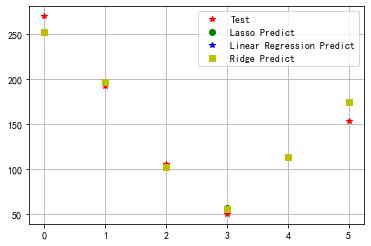

In [57]:
t = np.arange(len(x_test_econ))
plt.plot(t, y_test_econ, 'r*', linewidth=2, label='Test')
plt.plot(t, y_hat_econ, 'go', linewidth=2, label='Lasso Predict')
plt.plot(t, lr_testpred_econ, 'b*', linewidth=2, label='Linear Regression Predict')
plt.plot(t, y_hat2_econ, 'ys', linewidth=1, label='Ridge Predict')
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [58]:
print('Econ - Linear regression - CV test score(mean): ',np.mean(lr_cvscore_econ))
print('Econ - Lasso - CV test score(mean): ',np.mean(lasso_cvscore_econ))
print('Econ - Ridge - CV test score(mean): ',np.mean(ridge_cvscore_econ))

print('Econ - Linear regression - R2 on test data: ',lr_tscore_econ)
print('Econ - Lasso - R2 on test data: ',lasso_tscore_econ)
print('Econ - Ridge - R2 on test data: ',ridge_tscore_econ)

print('Econ - Linear regression - test RMSE: ',lr_mse_econ)
print('Econ - Lasso - test RMSE: ',mse_econ)
print('Econ - Ridge - test RMSE: ',mse2_econ)

Econ - Linear regression - CV test score(mean):  0.961955730489932
Econ - Lasso - CV test score(mean):  0.9662865957248814
Econ - Ridge - CV test score(mean):  0.9656968151032066
Econ - Linear regression - R2 on test data:  0.973224368490891
Econ - Lasso - R2 on test data:  0.9728592917321962
Econ - Ridge - R2 on test data:  0.9730865047461719
Econ - Linear regression - test RMSE:  130.71862330140073
Econ - Lasso - test RMSE:  132.50092790473673
Econ - Ridge - test RMSE:  131.3916740530413


更多参考：
- LASSOCV：
    https://scikit-learn.org/0.15/modules/generated/sklearn.linear_model.LassoCV.html
- CV 迭代图：
    https://scikit-learn.org/0.15/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py

## 非线性回归

In [65]:
'''多项式模型'''
x_train_econ_sel = x_train_econ.iloc[:,:2]
x_test_econ_sel = x_test_econ.iloc[:,:2]

poly_feat = PolynomialFeatures(degree=2)
'''Pipeline 模型转换器和估计器的构造'''
pipe_mods = Pipeline([('poly_features',poly_feat),\
                      ('lr',LinearRegression())])

pipe_mods.fit(x_train_econ_sel,y_train_econ)
poly_tscore_econ = pipe_mods.score(x_test_econ_sel,y_test_econ)

poly_cvpredict_econ = cross_val_predict(pipe_mods,x_train_econ_sel,y_train_econ,cv=5)
poly_cvscore_econ = cross_val_score(pipe_mods,x_train_econ_sel,y_train_econ,cv=5,scoring='r2')
poly_cvmean_econ = poly_cvscore_econ.mean()
print(poly_cvscore_econ)
print(poly_cvmean_econ)

[0.67304704 0.89317984 0.64131039 0.71441885 0.93569288]
0.7715297989201183


系数a: 4.033966896607926
系数b: 0.1300107625939959
系数c: -0.32064158895712674


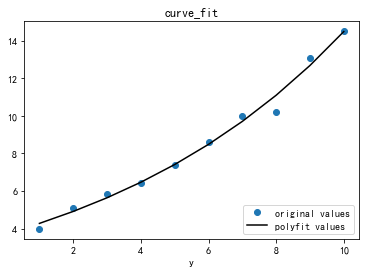

In [4]:
'''非多项式非线性回归：
a*e^bx+c拟合'''
def func(x, a, b,c):
    return a*np.exp(b*x)+c

x = np.arange(1, 11, 1)
y = np.array([3.98, 5.1, 5.85, 6.4, 7.4,8.6, 10, 10.2, 13.1, 14.5])
'''非线性最小二乘法拟合'''
popt, pcov = curve_fit(func, x, y)
'''拟合系数'''
a = popt[0]
b = popt[1]
c = popt[2]
print('系数a:', a)
print('系数b:', b)
print('系数c:', c)

y1 = func(x,a,b,c)
'''显示a*e^bx+c拟合的绘图结果'''
plt.plot(x, y, 'o',label='original values')
plt.plot(x, y1, 'k',label='polyfit values')
plt.xlabel('x')
plt.xlabel('y')
plt.title('curve_fit')
plt.legend(loc=4)
plt.show()


In [63]:
'''模型评估选择 lr，lasso，ridge，多项式等'''
evalscore = {
    'Linear regression':lr_cvscore_econ,
    'Lasso':lasso_cvscore_econ,
    'Ridge':ridge_cvscore_econ,
    'Polynomial':poly_cvscore_econ
}
evalscore_df = pd.DataFrame(evalscore)
evalscore_df

#evalscore_df.plot.kde(alpha=0.6,figsize=(15,10))

evalscore_df.mean().sort_values(ascending=False)

Lasso                0.966287
Ridge                0.965697
Linear regression    0.961956
Polynomial           0.771530
dtype: float64

In [66]:
'''测试数据集，test score'''
pred_score = {
    'Linear regression':lr_tscore_econ,
    'Lasso':lasso_tscore_econ,
    'Ridge':ridge_tscore_econ,
    'Polynomial':poly_tscore_econ
}

predscore_df = pd.DataFrame(pred_score,index=['score']).transpose()
predscore_df

predscore_df.sort_values(by='score',ascending=False)

,score
Linear regression,0.973224
Ridge,0.973087
Lasso,0.972859
Polynomial,0.905719


## 逻辑回归

In [17]:
churn_data

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [18]:
churn_data.Churn.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [19]:
'''目标预测列为不平衡数据'''
oversampler = SMOTE(random_state = 3)
osamp_X,osamp_y = oversampler.fit_resample(churn_data.iloc[:,1:],churn_data.Churn)
osamp_y.value_counts()

0    2850
1    2850
Name: Churn, dtype: int64

In [20]:
x_train_churn,x_test_churn,y_train_churn,y_test_churn = \
            train_test_split(osamp_X,osamp_y,\
                            test_size = 0.2,random_state = 2)

logreg = LogisticRegression(solver='liblinear')
logreg.fit(x_train_churn,y_train_churn)
y_testpred = logreg.predict(x_test_churn)
predprob = logreg.predict_proba(x_test_churn)
print(np.vstack((y_test_churn,y_testpred)))
print(predprob)

[[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 1 0]]
[[0.69187401 0.30812599]
 [0.89306155 0.10693845]
 [0.09475531 0.90524469]
 ...
 [0.85066435 0.14933565]
 [0.05816368 0.94183632]
 [0.70111836 0.29888164]]


In [22]:
'''预测性能分析:score() return mean accuracy on the given test data and labels'''
print('测试数据集的准确率为：{:.2f}'.format(logreg.score(x_test_churn,y_test_churn)))#%.2f
print(classification_report(y_test_churn,y_testpred))

测试数据集的准确率为：0.77
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       568
           1       0.78      0.77      0.77       572

    accuracy                           0.77      1140
   macro avg       0.77      0.77      0.77      1140
weighted avg       0.77      0.77      0.77      1140



[[444 124]
 [133 439]]


<AxesSubplot:>

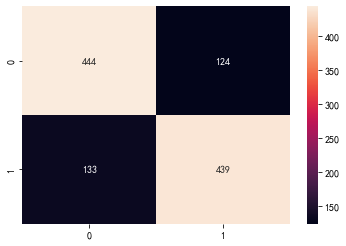

In [23]:
'''confusion matrix 混淆矩阵'''
confmat = confusion_matrix(y_test_churn,y_testpred)
print(confmat)
sns.heatmap(confmat,annot=True,fmt='d')

Area under curve: 0.774586329163794


Text(0.5, 1.0, 'receiver operating characteristic curve')

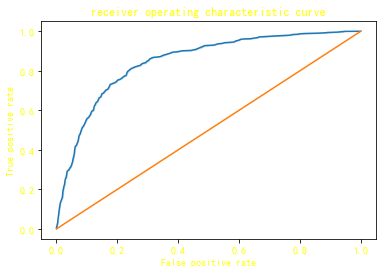

In [24]:
'''ROC曲线'''
roc_score = roc_auc_score(y_test_churn,y_testpred)
print('Area under curve:',roc_score)

fpr,tpr,thred = roc_curve(y_test_churn,predprob[:,1])
trace = sns.lineplot(x = fpr, y = tpr)
trace_base = sns.lineplot(x = [0,1], y = [0,1])
plt.xlabel('False positive rate',color='yellow')
plt.ylabel('True positive rate',color='yellow')
plt.xticks(color='yellow')
plt.yticks(color='yellow')
plt.title('receiver operating characteristic curve',color='yellow')

### 补充参考：集成学习回归

In [10]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import plot_importance
from xgboost.sklearn import XGBRegressor

In [50]:
rfreg = RandomForestRegressor(max_depth = 5,random_state=15,n_estimators=50,min_weight_fraction_leaf=0.28)#max_depth=15,20,50?
rfreg.fit(x_train_econ,y_train_econ)
print('Train score:',rfreg.score(x_train_econ,y_train_econ))
print('Test score:',rfreg.score(x_test_econ,y_test_econ))

Train score: 0.7736832263756915
Test score: 0.7410092593647275


更多参数请参考：https://scikit-learn.org.cn/view/650.html

调参：https://scikit-learn.org/stable/modules/ensemble.html#random-forest-parameters

In [145]:
gbreg = GradientBoostingRegressor(max_depth=10,random_state=15,n_estimators=20,subsample=0.7)#max_depth:5,10，15
gbreg.fit(x_train_econ,y_train_econ)
print('Train score:',gbreg.score(x_train_econ,y_train_econ))
print('Test score:',gbreg.score(x_test_econ,y_test_econ))

Train score: 0.976710024659649
Test score: 0.9224886704074565


In [192]:
xgbreg = XGBRegressor(max_depth=5,n_estimators = 30,random_state=23,reg_alpha=0.1,reg_lambda=0.1,min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8)
xgbreg.fit(x_train_econ,y_train_econ)
print('Train score:',xgbreg.score(x_train_econ,y_train_econ))
print('Test score:',xgbreg.score(x_test_econ,y_test_econ))


Train score: 0.9985417366599022
Test score: 0.9377154106361095


更多调参请参考：
https://blog.csdn.net/csiao_Bing/article/details/84978725

https://zhuanlan.zhihu.com/p/297751352

LGBMRegressor调参参考：

https://developer.aliyun.com/article/798857

https://baijiahao.baidu.com/s?id=1669714465634642214&wfr=spider&for=pc

https://blog.csdn.net/weixin_42163563/article/details/121197887

https://cloud.tencent.com/edu/learning/course-2439-39689